In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IDaug Plots

In [2]:
import pandas as pd

In [22]:
base_model = '/content/drive/MyDrive/Courses/Deep_Learning_Course/project/exps/batch[8]_kernels[32]_layers[2]_attn[False]_ffc[False]/plots/loss_df.csv'
ffc_attn_model = '/content/drive/MyDrive/Courses/Deep_Learning_Course/project/exps/batch[8]_kernels[32]_layers[2]_attn[True]_ffc[True]/plots/loss_df.csv'
attn_model = '/content/drive/MyDrive/Courses/Deep_Learning_Course/project/exps/batch[8]_kernels[32]_layers[2]_attn[True]_ffc[False]/plots/loss_df.csv'

In [59]:
df_base_model = pd.read_csv(base_model)
df_ffc_attn_model = pd.read_csv(ffc_attn_model)
df_attn_model = pd.read_csv(attn_model)

In [60]:
dataframes = [df_base_model, df_ffc_attn_model, df_attn_model]

In [61]:
for df in dataframes:
  for column in ['val_losses', 'train_losses']:
    # df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())   
    df[column] = df[column]/100 
    df[column] = df[column].round(4)

In [62]:
df_base_model

,Unnamed: 0,train_losses,val_losses
0,0,4.0636,3.1145
1,1,3.2915,3.0889
2,2,3.2125,3.1143
3,3,3.1698,3.0910
4,4,3.1218,3.0936


In [63]:
base_model_val = df_base_model['val_losses'].to_numpy()
base_model_train = df_base_model['train_losses'].to_numpy()
ffc_attn_model_val = df_ffc_attn_model['val_losses'].to_numpy()
ffc_attn_model_train = df_ffc_attn_model['train_losses'].to_numpy()
attn_model_val = df_attn_model['val_losses'].to_numpy()
attn_model_train = df_attn_model['train_losses'].to_numpy()

In [ ]:
# Accuracy = df_idaug['Accuracy'].to_numpy()
# Precision_Faulty = df_idaug['Precision Faulty'].to_numpy()
# Precision_NonFaulty = df_idaug['Precision Non-Faulty'].to_numpy()
# Recall_Faulty = df_idaug['Recall Faulty'].to_numpy()
# Recall_NonFaulty = df_idaug['Recall Non-Faulty'].to_numpy()
# Fmeasure_Faulty = df_idaug['F-measure Faulty'].to_numpy()
# Fmeasure_NonFaulty = df_idaug['F-measure Non-Faulty'].to_numpy()

In [36]:
def plot_bars(axs, grid, metric, colors, space=False, space_val=0):
  X = np.arange(1)
  for i in range(1):
    idx = X + (i + 1 + int(space)*space_val) * 0.1
    axs[grid].bar(idx, metric, color = colors[i], width=0.1)
    axs[grid].text(idx, metric/2 , str(metric), color='black', ha = 'center',  rotation=90)
  
  axs[grid].grid(color='#9F9F9F')
  axs[grid].set_axisbelow(True)

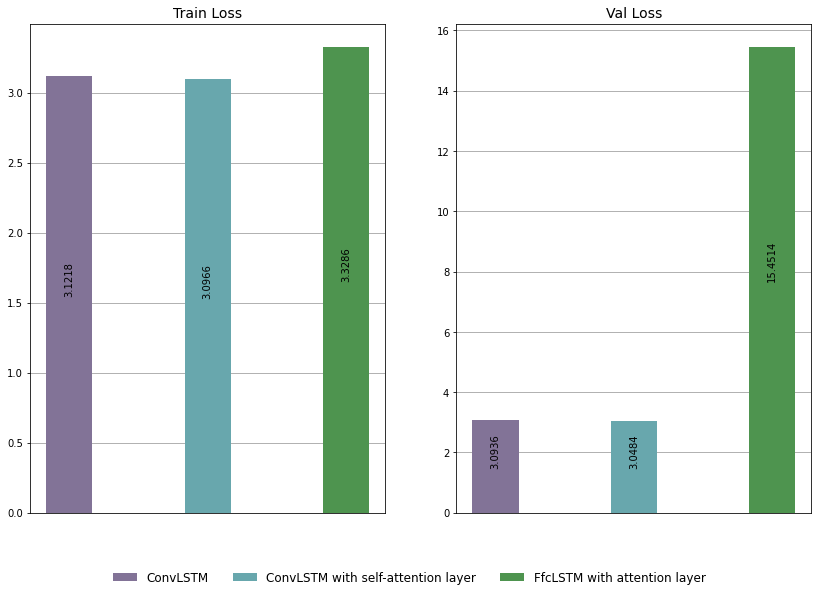

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
labels = ['ConvLSTM', 'ConvLSTM with self-attention layer', 
          'FfcLSTM with attention layer']

fig, axs = plt.subplots(1, 2, figsize=(14, 9))


#grids
train_grid  = (0)
val_grid = (1)


#colors
statment_w     = '#827397'
statment_wo    = '#E9D5DA'
square_w       = '#4E944F'
square_wo      = '#B4E197'
checked_w      = '#68A7AD'
checked_wo     = '#99C4C8'

statment_colors = [statment_w, statment_wo]
square_colors = [square_w, square_wo]
checked_colors = [checked_w, checked_wo]


plot_bars(axs, train_grid, base_model_train[-1]    , statment_colors)                                       # Accurcay
plot_bars(axs, train_grid, attn_model_train[-1]    , checked_colors, space=True, space_val=3)           # Accurcay
plot_bars(axs, train_grid, ffc_attn_model_train[-1], square_colors, space=True, space_val=6)          # Accurcay




plot_bars(axs, val_grid, base_model_val[-1]    , statment_colors)                                         # Accurcay
plot_bars(axs, val_grid, attn_model_val[-1]    , checked_colors, space=True, space_val=3)             # Accurcay
plot_bars(axs, val_grid, ffc_attn_model_val[-1], square_colors, space=True, space_val=6)            # Accurcay


matplotlib.rcParams['font.family'] = ['Source Han Sans TW', 'sans-serif']

axs[train_grid].set_title("Train Loss", fontsize=14)
axs[val_grid].set_title("Val Loss", fontsize=14)

# fig.legend(labels=labels, fontsize='large' , ncol=7, frameon=False,  loc=(0.075, 0.04))
fig.legend(labels=labels, fontsize='large' , ncol=3, frameon=False,  loc="lower center")

for axi in axs:
    axi.axes.xaxis.set_visible(False)

fig.savefig('plot.png', dpi=fig.dpi)
